# Keras Regression Project

This is a coding along project, which main purpose is to discover this new tool :)  let's go

Based of a real world data set we're going to try to predict the price that a house should sell at.
The data is available on Kaggle: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#let's load our data
df=pd.read_csv('../DATA/kc_house_data.csv')

In [3]:
#checking if we have missing data
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


Let's start some exploratory data analysis (EDA)

<Figure size 1200x800 with 0 Axes>

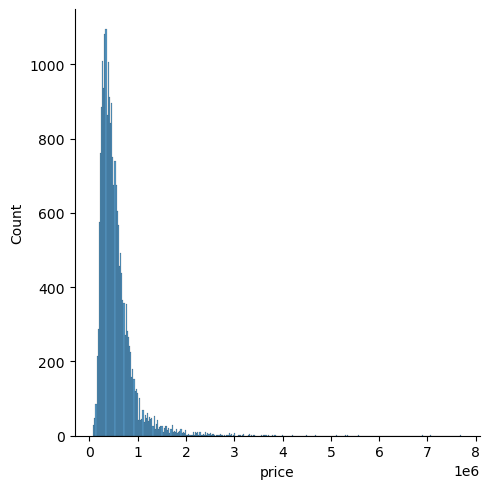

In [7]:
plt.figure(figsize=(12,8))
sns.displot(df['price'])

In [13]:
# notice that we have prices going up to 8 million dollars
# cosidering that a very big portion of our data is concentrated between 0 and 1,5 million dollars,
# when building a model for the real world it may be interesting to drop these extreme outliers 

C:\Users\slucianq\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

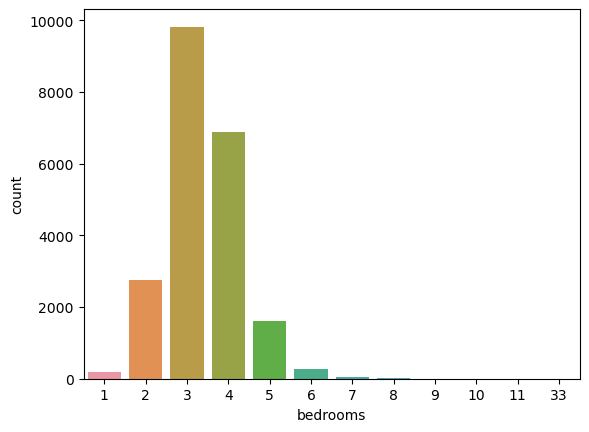

In [8]:
sns.countplot(df['bedrooms'])

In [9]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [10]:
 df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

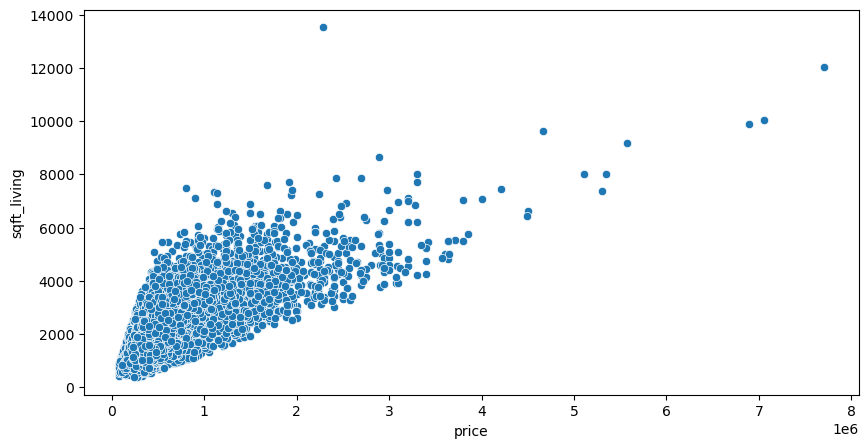

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price', y='sqft_living', data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

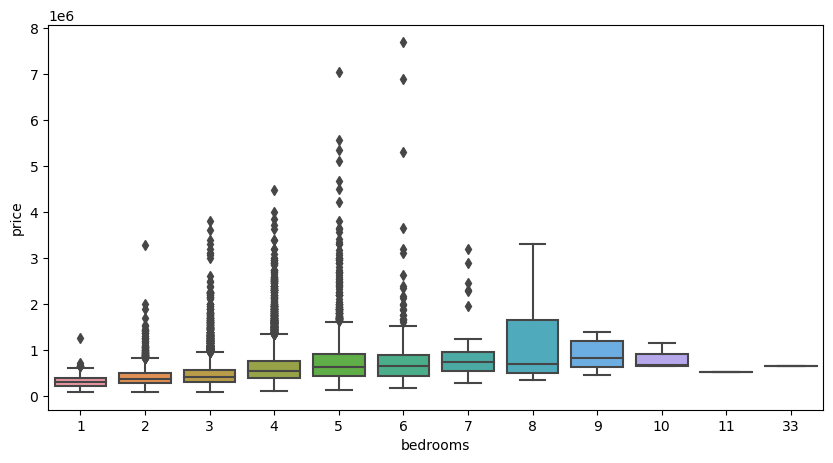

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x='bedrooms', y='price', data=df)

In [13]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Sorting the houses by their geographical position

<AxesSubplot:xlabel='price', ylabel='long'>

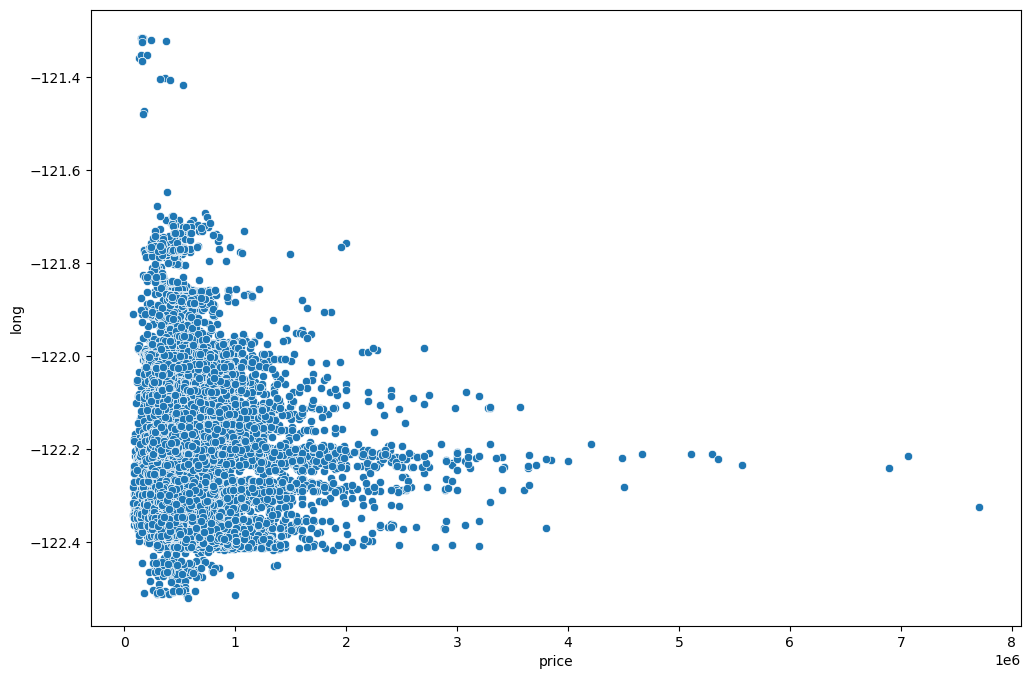

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='long', data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

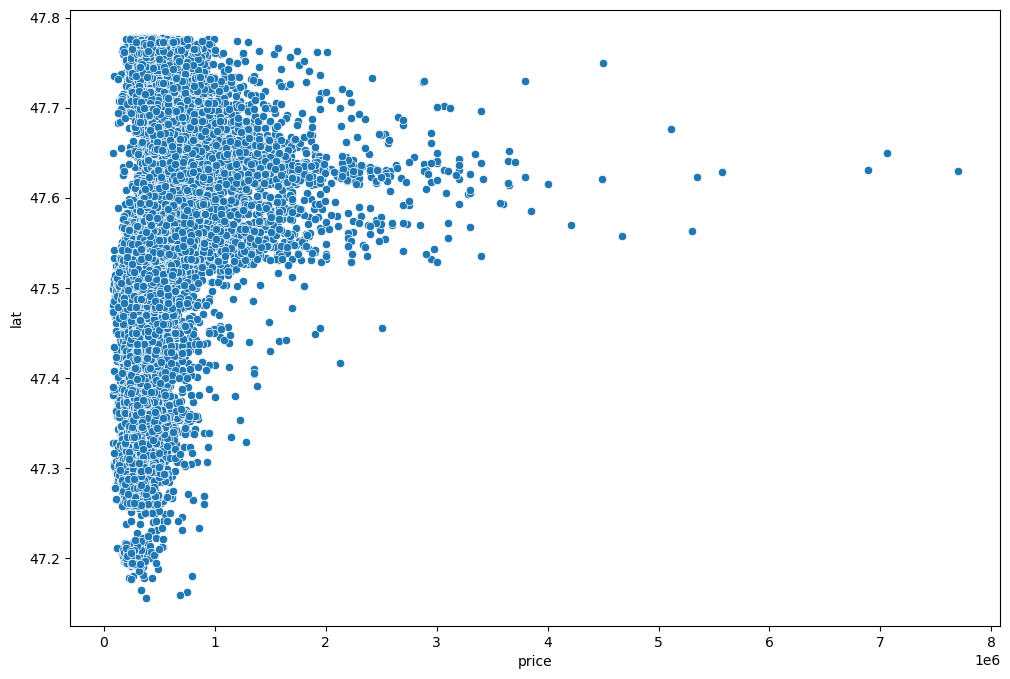

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='lat', data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

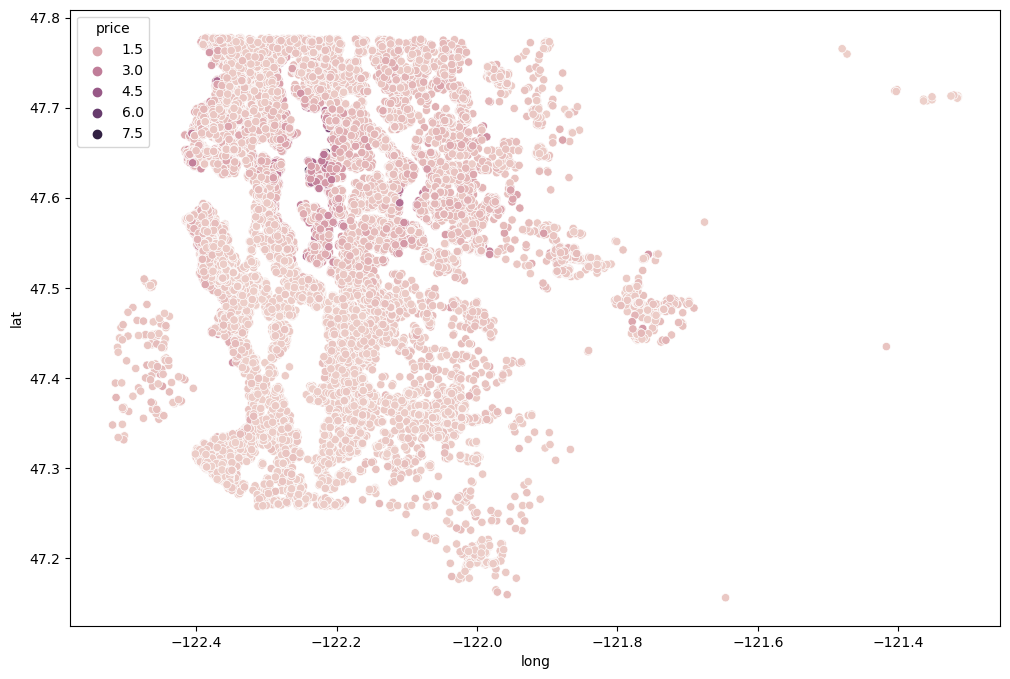

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

In [35]:
# we can see some darker points on the map, however we still don't have a good gradient, as we would like to
# and this is because of the really expensive houses (the outliers)
# let's try to improve this map by dropping some of these outliers

In [17]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [39]:
# here we can see the prices in decreasing order. The most expensive is 7.7 million dollars and then it decreases to 3.6
# the distibution plot shows that we can expect a kind of cut off on around 3.5 million dollars

In [18]:
len(df)

21597

In [41]:
#in the data set we have almost 22.000 houses. Facing the outliers issue, we can consider to drop the top 1% of the housing
# and still have a pretty doog amount of data to work with

In [19]:
len(df)*0.01

215.97

In [20]:
non_top_1_perc=df.sort_values('price', ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

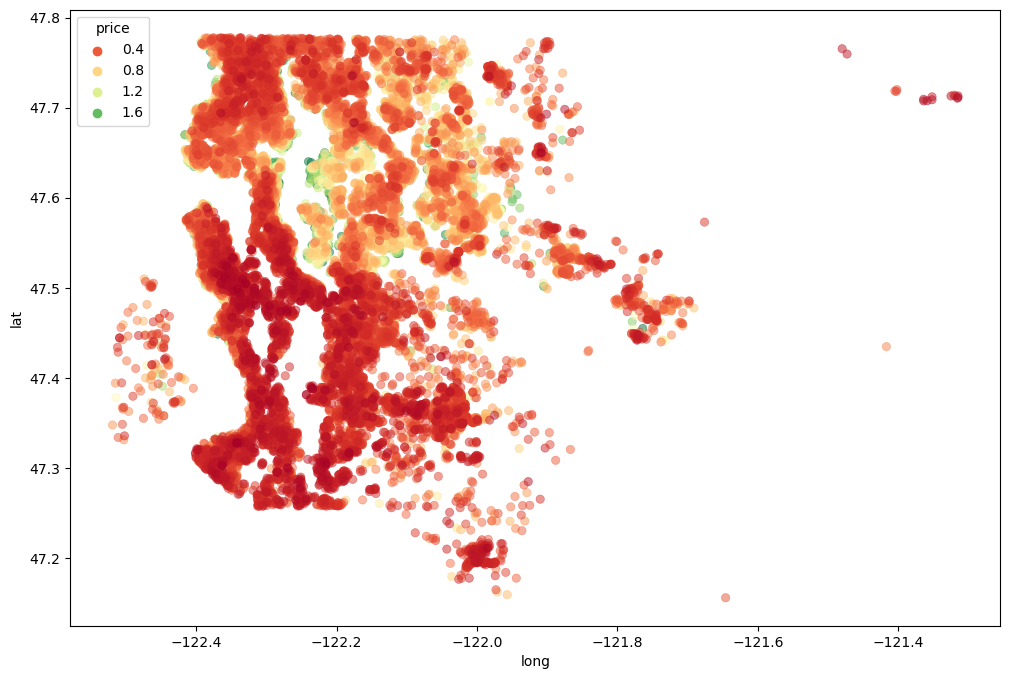

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, hue='price', edgecolor=None, alpha=0.5, palette='RdYlGn')

In [23]:
# now we can see bettere where the most expensive houses are located on the map
# it also shows that the houses that have a waterfront are more expensive 

<AxesSubplot:xlabel='waterfront', ylabel='price'>

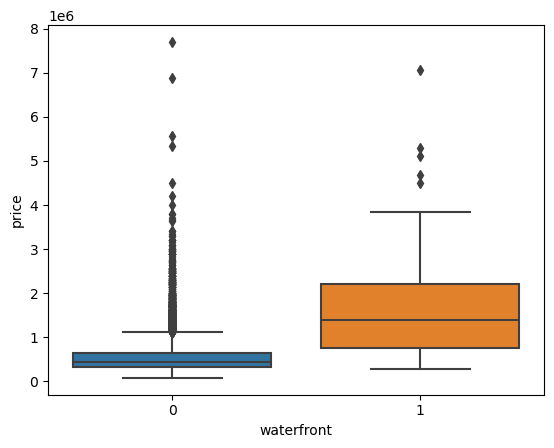

In [24]:
sns.boxplot(x='waterfront', y='price', data=df)

In [56]:
# 1 means you have waterfront

<AxesSubplot:xlabel='waterfront', ylabel='price'>

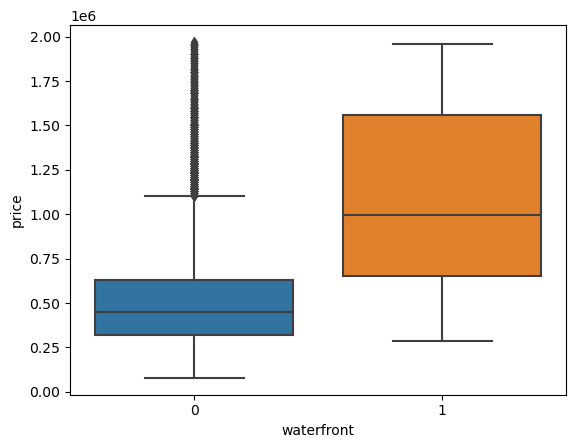

In [25]:
sns.boxplot(x='waterfront', y='price', data=non_top_1_perc)

Let's clean a bit our data and start some featuring engineering to drop some information that are not usefull for us

In [26]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [27]:
df=df.drop('id', axis=1)

In [28]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [64]:
# at state it looks like a string, let's convert to a datetime type

In [29]:
df['date']=pd.to_datetime(df['date'])

In [30]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [31]:
df['year']=df['date'].apply(lambda date: date.year)
df['month']=df['date'].apply(lambda date: date.month)

In [32]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [73]:
# since this info is fixed, let's do some EDA based on them

<AxesSubplot:xlabel='month', ylabel='price'>

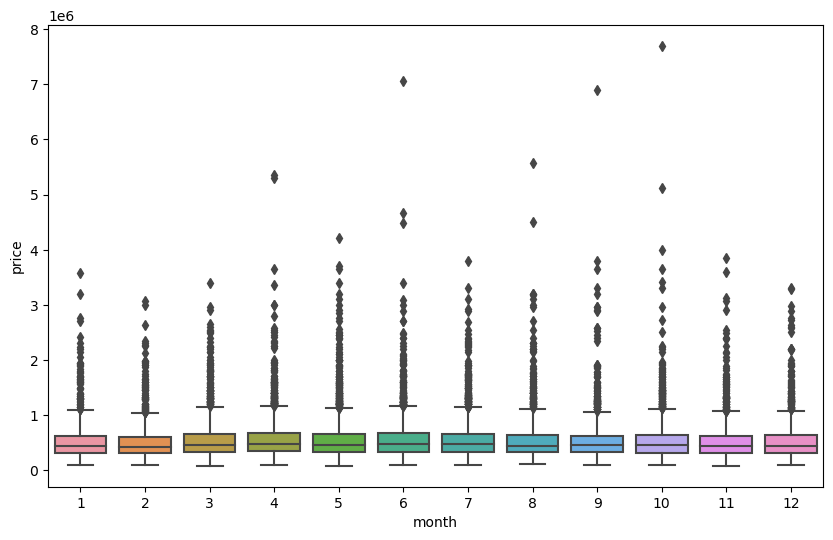

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='price', data=df)

In [34]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

<AxesSubplot:xlabel='month'>

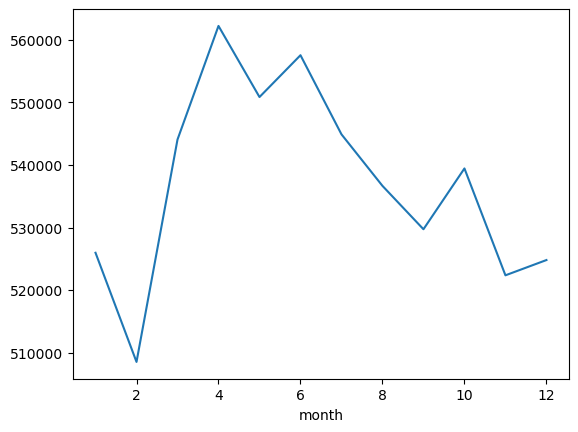

In [35]:
df.groupby('month').mean()['price'].plot()

In [36]:
df=df.drop('date', axis=1) #since we transformed the date information, we can drop the original one

In [37]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [38]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [81]:
# 70 categories is a big number for us to transform this in dummy variables, so better drop it as it's not relevant on the case

In [39]:
df=df.drop('zipcode', axis=1)

In [88]:
# let's explore another column that might be a problem

In [40]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [90]:
# here the 0 is not a year, basically it states for never renovated
# maybe in this case would make more sense to categorize this info in "renovated" or "not renovated" 

In [41]:
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

Scaling and Spliting the data

In [42]:
# separating the features from the label (price is the label)
X=df.drop('price', axis=1).values
y=df['price'].values

In [43]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Scaling the data

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
# we can fit and transform the training data in a single step here
X_train = scaler.fit_transform(X_train)

In [48]:
# here we can transform the test portion of the data
# WE DO NOT FIT THE TEST DATA
X_test = scaler.transform(X_test)

Let's create the model

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [50]:
X_train.shape

(15117, 19)

In [51]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
# continuous problem => mse

Fittin and Training the model  :) 

In [52]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)

#setting up the 'validation_data' here allows us to evaluate the model (checking our loss) after every epoch using the test data
# but without causing any leakage or mmix of information

#because it is a very large data set, we're gonna pass our data in batch sizes, which is normally done in powers of 2
# the smaller the batch size, the longer it takes, but smaller is the risk of over fitting 

Epoch 1/400
119/119 [==============================] - 1s 3ms/step - loss: 430245216256.0000 - val_loss: 418941534208.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 429307396096.0000 - val_loss: 415548473344.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 415126880256.0000 - val_loss: 382851678208.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 343880335360.0000 - val_loss: 267093999616.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 197017780224.0000 - val_loss: 123774369792.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 106800906240.0000 - val_loss: 95063580672.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 97405247488.0000 - val_loss: 93506912256.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 95803572224.0000 - val_loss: 92019531776.0000
Epoch 9/400
119/119 [

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 33031342080.0000 - val_loss: 31688683520.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 33066147840.0000 - val_loss: 31547164672.0000
Epoch 137/400
119/119 [==============================] - 0s 3ms/step - loss: 32989106176.0000 - val_loss: 31479920640.0000
Epoch 138/400
119/119 [==============================] - 0s 3ms/step - loss: 32917542912.0000 - val_loss: 31584092160.0000
Epoch 139/400
119/119 [==============================] - 0s 3ms/step - loss: 32899993600.0000 - val_loss: 31413295104.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 32892033024.0000 - val_loss: 31441434624.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 32846542848.0000 - val_loss: 31353587712.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 32842436608.0000 - val_loss: 31355267072.0000
Epoch 143/400
11

119/119 [==============================] - 0s 3ms/step - loss: 30710603776.0000 - val_loss: 28775577600.0000
Epoch 268/400
119/119 [==============================] - 0s 3ms/step - loss: 30696675328.0000 - val_loss: 28776775680.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30704353280.0000 - val_loss: 28751751168.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30712365056.0000 - val_loss: 28742389760.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 30699925504.0000 - val_loss: 28764997632.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30647427072.0000 - val_loss: 28692707328.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 30662955008.0000 - val_loss: 28758693888.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 30651406336.0000 - val_loss: 28676169728.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29675020288.0000 - val_loss: 27452588032.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 29740675072.0000 - val_loss: 27522516992.0000


In [53]:
X_train.shape

(15117, 19)

In [54]:
model.history.history

{'loss': [430245216256.0,
  429307396096.0,
  415126880256.0,
  343880335360.0,
  197017780224.0,
  106800906240.0,
  97405247488.0,
  95803572224.0,
  94190125056.0,
  92572213248.0,
  90893967360.0,
  89148112896.0,
  87377444864.0,
  85505744896.0,
  83640008704.0,
  81567735808.0,
  79483027456.0,
  77314146304.0,
  75076739072.0,
  72753840128.0,
  70443016192.0,
  68030595072.0,
  65615994880.0,
  63286435840.0,
  61022126080.0,
  58977894400.0,
  57117999104.0,
  55492960256.0,
  54067904512.0,
  52903669760.0,
  51924148224.0,
  51079204864.0,
  50334564352.0,
  49697456128.0,
  49101012992.0,
  48579145728.0,
  48096788480.0,
  47625068544.0,
  47201452032.0,
  46780063744.0,
  46388154368.0,
  45937045504.0,
  45574672384.0,
  45166141440.0,
  44774330368.0,
  44452057088.0,
  44037181440.0,
  43761778688.0,
  43351355392.0,
  43074891776.0,
  42760200192.0,
  42490109952.0,
  42169880576.0,
  41940545536.0,
  41626742784.0,
  41325395968.0,
  41088667648.0,
  40792461312.0,


In [55]:
pd.DataFrame(model.history.history)
# loss is generated by the training data
# val_loss is the loss on obtained by the validation data (test data)

,loss,val_loss
0,4.302452e+11,4.189415e+11
1,4.293074e+11,4.155485e+11
2,4.151269e+11,3.828517e+11
3,3.438803e+11,2.670940e+11
4,1.970178e+11,1.237744e+11
...,...,...
395,2.967445e+10,2.743888e+10
396,2.974290e+10,2.749778e+10
397,2.967090e+10,2.752238e+10
398,2.967502e+10,2.745259e+10


In [56]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

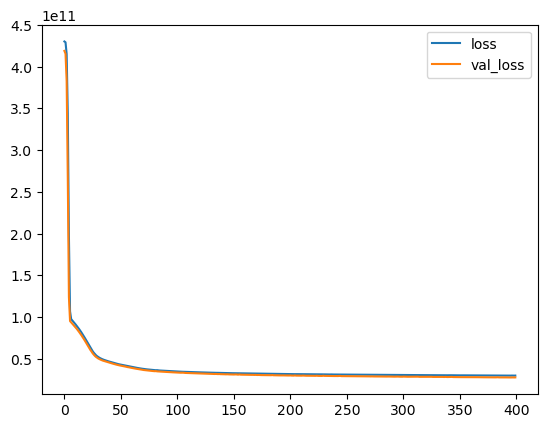

In [57]:
losses.plot()

In [58]:
# with the plot above, both lines are decreasing together (good), but it also means that we could continue to train the 
# model without over fitting it

# if the orange line spikes up, it means that an over fitting has occured 

Evaluating the model

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [60]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 608us/step


In [61]:
predictions

array([[402666.22],
       [603944.56],
       [567941.6 ],
       ...,
       [376593.7 ],
       [554403.6 ],
       [693299.7 ]], dtype=float32)

In [62]:
# let's compare the predictions with the correct values
mean_squared_error(y_test, predictions)

27522528170.785995

In [63]:
np.sqrt(mean_squared_error(y_test, predictions))

165899.15060296722

In [64]:
mean_absolute_error(y_test, predictions)

102800.4244176794

are these good ? let's see the context

In [65]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [66]:
5.402966e+05

540296.6

our error is about 20% the price of the house, so it's not that great

In [67]:
explained_variance_score(y_test, predictions)

0.7928698079476818

considering that 1 is the best score for explained_variance_score, the result above is not bad

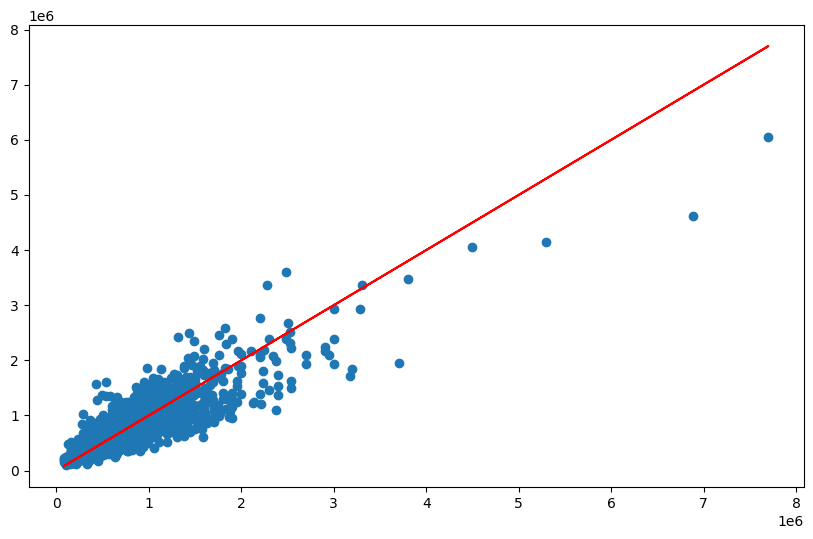

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')  # this line represents the perfect prediction line

Using the model to predict the price

In [69]:
#let's just take a look on the df
df.drop('price', axis=1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


In [70]:
df.drop('price', axis=1).iloc[0]

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [71]:
df.drop('price', axis=1).iloc[0]
#let's use these features to predict the price

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [72]:
single_house=df.drop('price', axis=1).iloc[0]

In [73]:
single_house.values.reshape(-1, 19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [74]:
scaler.transform(single_house.values.reshape(-1, 19))

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [75]:
# scaler is not working

In [76]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [77]:
model.predict(single_house)

1/1 [==============================] - 0s 17ms/step


array([[281826.34]], dtype=float32)

In [78]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


We can see that the price predicted is 281826.34 dollars and the real value is 221900 dollars, which means that the prediction is not that far from the actual value, so it's quite ok